In [4]:
from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.3)

In [1]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [6]:
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [7]:
model.score(X_test,y_test)

0.8092592592592592

In [16]:
X_test[0]

array([ 0.,  0.,  4., 14., 16.,  4.,  0.,  0.,  0.,  3., 16., 16., 16.,
        6.,  0.,  0.,  0.,  8., 16., 12., 16.,  7.,  0.,  0.,  0.,  3.,
        5., 12., 15.,  0.,  0.,  0.,  0.,  0.,  0., 15., 12.,  0.,  0.,
        0.,  0.,  0.,  6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  8., 16.,
       12.,  5.,  1.,  0.,  0.,  0.,  4., 16., 16., 15.,  4.,  0.])

In [14]:
X_test[0].reshape(8,8)

array([[ 0.,  0.,  4., 14., 16.,  4.,  0.,  0.],
       [ 0.,  3., 16., 16., 16.,  6.,  0.,  0.],
       [ 0.,  8., 16., 12., 16.,  7.,  0.,  0.],
       [ 0.,  3.,  5., 12., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 15., 12.,  0.,  0.,  0.],
       [ 0.,  0.,  6., 16.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  8., 16., 12.,  5.,  1.,  0.],
       [ 0.,  0.,  4., 16., 16., 15.,  4.,  0.]])

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
X_test[3]

array([ 0.,  1., 12., 16., 16.,  9.,  0.,  0.,  0.,  2., 14.,  5.,  9.,
       14.,  0.,  0.,  0.,  0.,  0.,  1., 12., 11.,  0.,  0.,  0.,  0.,
        0., 12., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  2.,  8., 15.,  5.,
        0.,  0.,  0.,  2.,  0.,  0., 11.,  9.,  0.,  0.,  4., 14.,  4.,
        4., 14.,  6.,  0.,  0.,  0., 15., 16., 16., 11.,  1.,  0.])

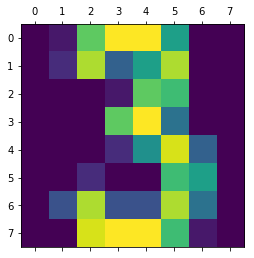

In [23]:
plt.matshow(X_test[3].reshape(8,8))

In [24]:
model.predict([X_test[3]])

array([3])

In [26]:
import pandas as pd

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [83]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [85]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [30]:
#inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [86]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [87]:
inputs = pd.concat([inputs,dummies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [88]:
inputs.drop('Sex',axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0


In [89]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [90]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [92]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [93]:
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [94]:
model.score(X_test,y_test)

0.8100558659217877

In [98]:
X_test[0:10]

,Pclass,Age,Fare,female,male
121,3,29.699118,8.0500,0,1
753,3,23.000000,7.8958,0,1
662,1,47.000000,25.5875,0,1
26,3,29.699118,7.2250,0,1
851,3,74.000000,7.7750,0,1
408,3,21.000000,7.7750,0,1
116,3,70.500000,7.7500,0,1
370,1,25.000000,55.4417,0,1
327,2,36.000000,13.0000,1,0
183,2,1.000000,39.0000,0,1


In [99]:
y_test[0:10]

121    0
753    0
662    0
26     0
851    0
408    0
116    0
370    1
327    1
183    1
Name: Survived, dtype: int64

In [100]:
model.predict(X_test[0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)